# Ejercicio 3
3- Realice una registración basada en características de la imágenes contenidas en “PAIByB-5”
utilizando detectores de Harris como puntos a emparejar, evaluando los resultados con las métricas
de la GUIA I ¿Qué conclusiones puede sacar al respecto? Comparar los resultados con los ejercicios
anteriores.

In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from registration import Imagen, Registracion
from reg_toolkit import lista_de_paths, agrupar_paths
from reg_toolkit import peak_SNR, getPathfiles

In [6]:
base_dir = 'PAIByB-5'
#extrigo paths 
lista_paths = list(getPathfiles(base_dir).values())
# Agrupar los paths
un_digito, dos_digitos = agrupar_paths(lista_paths)
#aplico la clase Imagen, esta me lee la imagen y calcula los puntos calve 
un_digito_imgs = [Imagen(image, feature_extractor='harris', harris_thres=0.01) for image in un_digito ]
dos_digito_imgs = [Imagen(image, feature_extractor='harris', harris_thres=0.01) for image in dos_digitos ]


________________________________________________________________________________
Imagen PAIByB-5/img-2


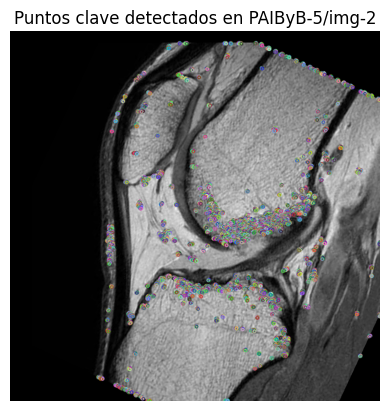

Matches encontrados: 478


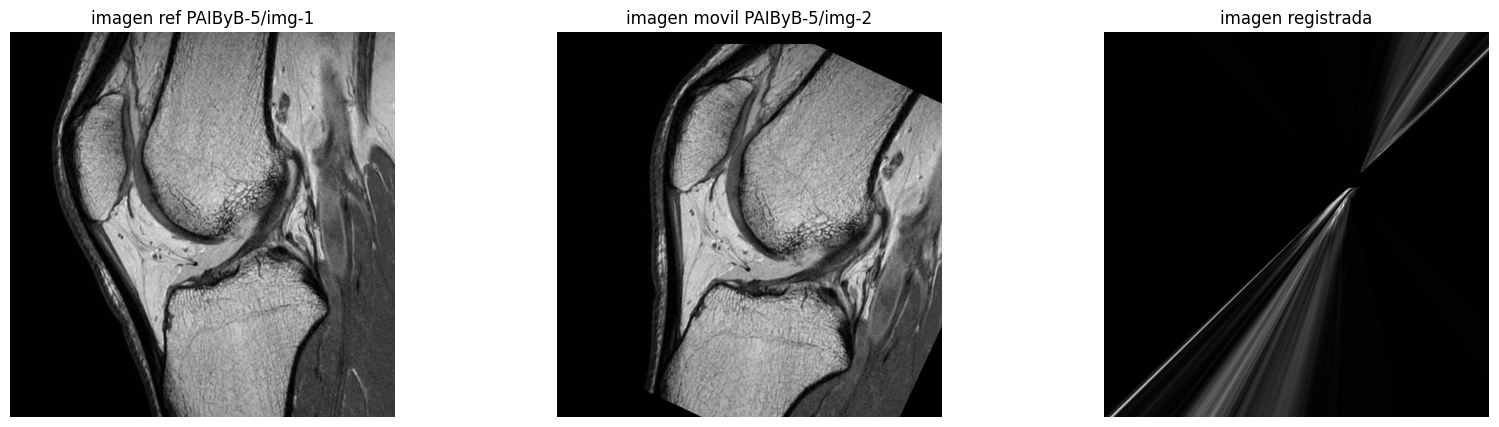

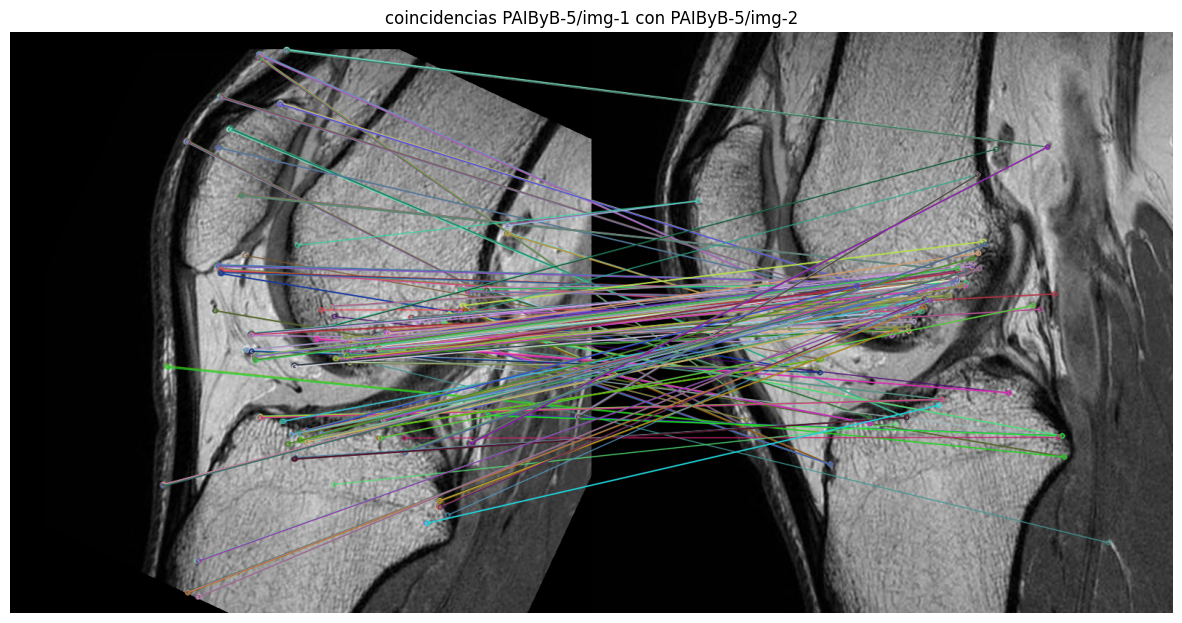

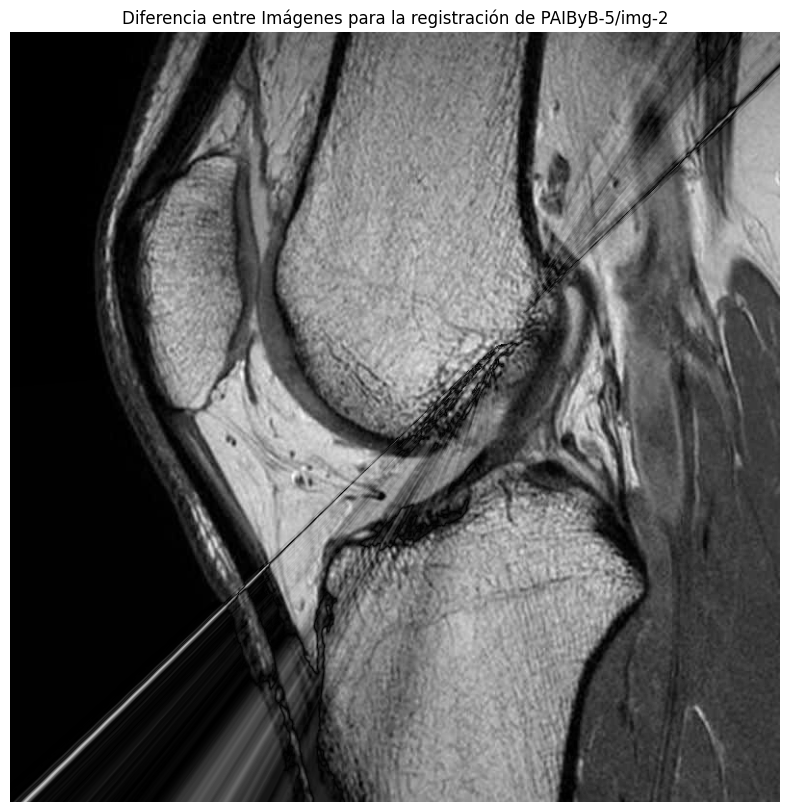

SSIM: 0.1806
MSE: 86.7198
PSNR: 66.1984

________________________________________________________________________________
Imagen PAIByB-5/img-3


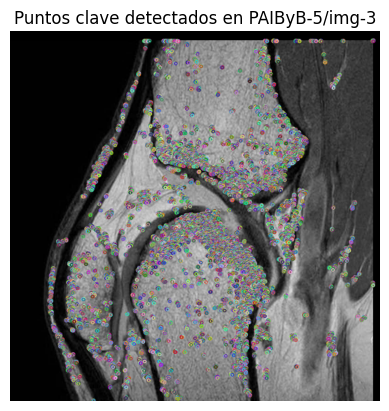

Matches encontrados: 1641


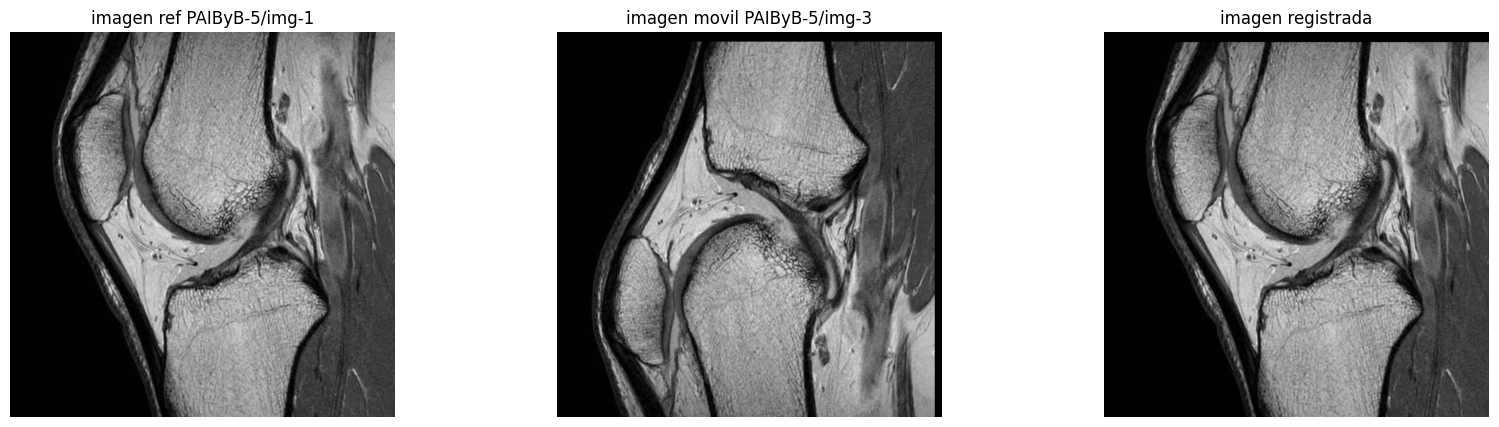

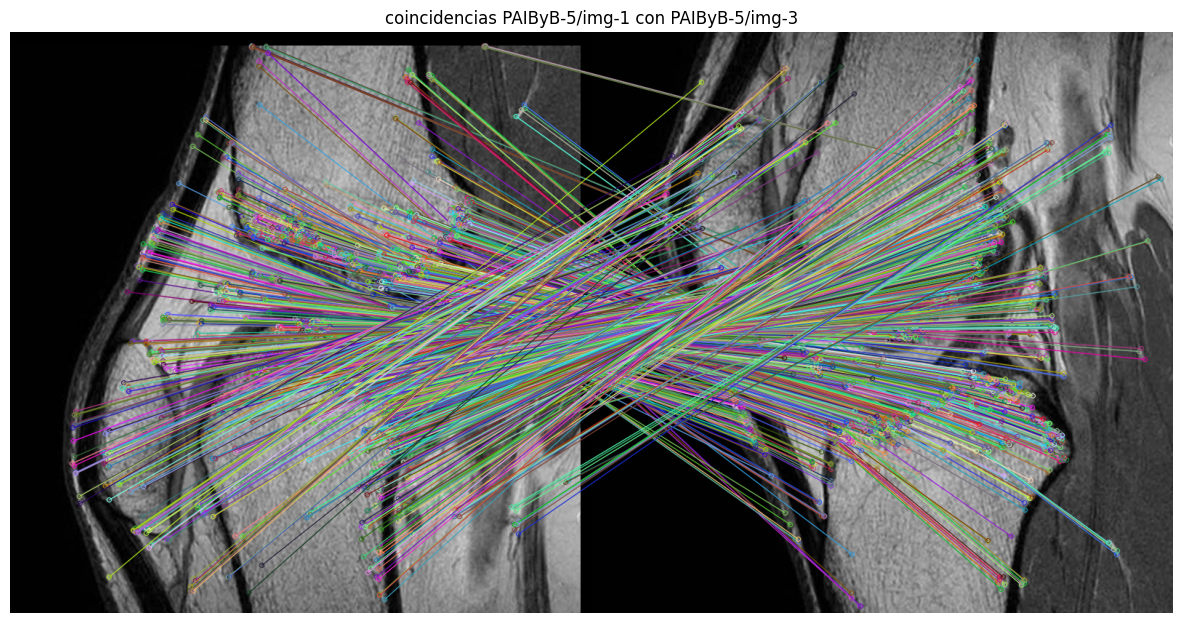

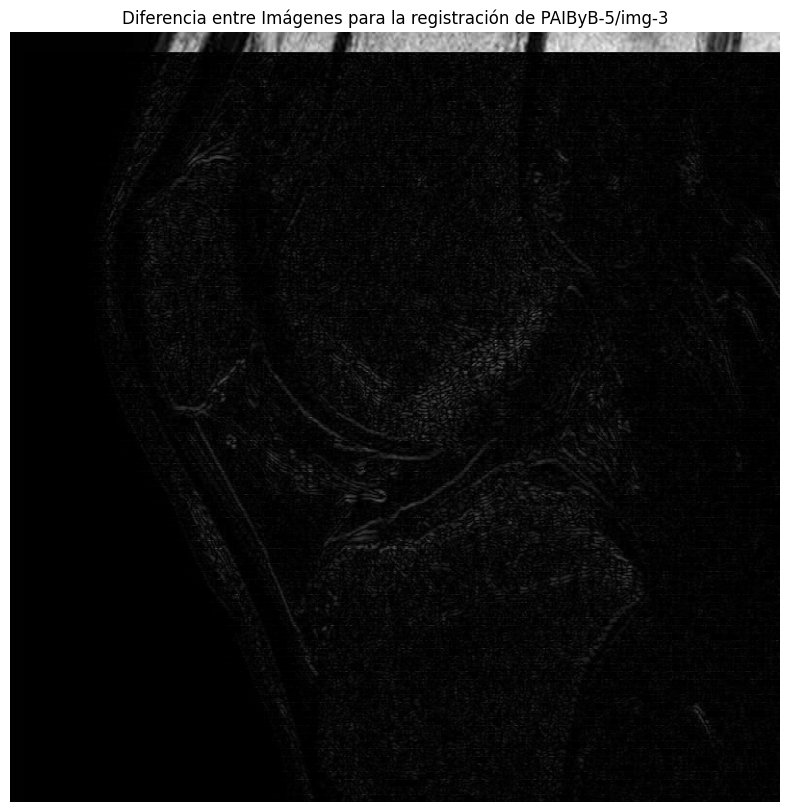

SSIM: 0.9063
MSE: 24.4468
PSNR: 78.8603

________________________________________________________________________________
Imagen PAIByB-5/img-4


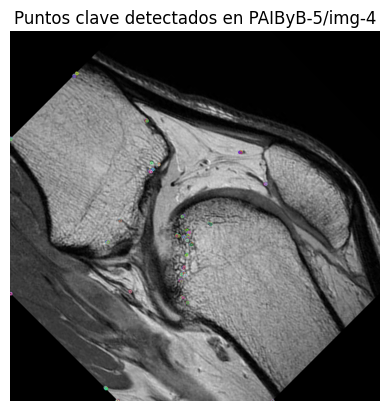

Matches encontrados: 15
Error en la imagen PAIByB-5/img-4
La homografía no ha sido calculada.


In [8]:
img_ref = un_digito_imgs[0]
for img in un_digito_imgs[1:]:
    try:
        print('\n'+80*'_')
        print(f'Imagen {img.nombre}')
        img.mostrar_puntos_clave()
        # Crea una instancia de Registracion utilizando Harris como descriptor
        prueba = Registracion(imagen_referencia=img_ref,
                              imagen_movil=img,
                              lowe_threshold=0.3,
                              min_match_count=4)
        prueba.ejecutar_registracion()
    except Exception as e:
        print(f'Error en la imagen {img.nombre}')
        print(e)
        continue

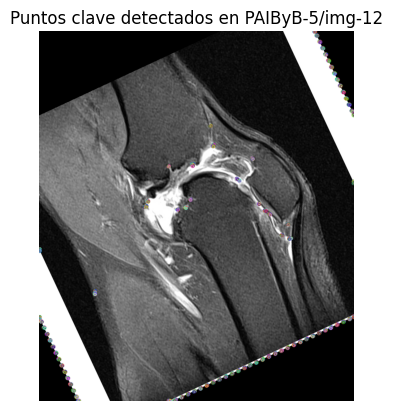

In [9]:
dos_dig_ref = dos_digito_imgs[0]
dos_dig_img = dos_digito_imgs[1]

dos_dig_img.mostrar_puntos_clave()

In [10]:
for img in dos_digito_imgs[1:]:
    try:
        print('\n'+80*'_')
        print(f'Imagen {img.nombre}')
        # Crea una instancia de Registracion utilizando Harris como descriptor
        prueba = Registracion(imagen_referencia=dos_digito_imgs[0],
                              imagen_movil=img,
                              lowe_threshold=1,
                              ransac_thres=0,
                              min_match_count=4)
        prueba.ejecutar_registracion()
    except Exception as e:
        print(f'Error en la imagen {img.nombre}')
        print(e)
        continue


________________________________________________________________________________
Imagen PAIByB-5/img-12
Matches encontrados: 40
Error en la imagen PAIByB-5/img-12
La homografía no ha sido calculada.


### Conclusiones
En general, la registración basada en características de las imágenes contenidas en “PAIByB-5” utilizando detectores de Harris como puntos a emparejar, no resultó ser efectiva. En la mayoría de los casos, la registración no se pudo llevar a cabo. En los casos en los que se logró, la registración no resultó ser efectiva, ya que no se logró un buen alineamiento entre las imágenes.
Solo en el caso de la imagen rotada se consiguieron resultados aceptables, pero no se logró un alineamiento perfecto en ninguno de los otros casos.

Los motivos podrían ser:
- La baja cantidad de puntos clave detectados por el detector de Harris.
- La detección de falsos puntos clave en los bordes de las imágenes.